In [5]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import preprocessing
from tensorflow import keras
from sklearn.metrics import accuracy_score



In [6]:
def lr_schedule(epoch, lr):
    if epoch < 10:
        return 0.01
    elif epoch < 25:
        return 0.001
    else:
        return 0.0001



In [7]:
np.random.seed(12227)

n = 48221
m = 16
n_classes = 2
#Opt1
X = np.random.rand(n, m)
y = np.random.randint(0, n_classes, size=n)

#Opt2
X, y = make_classification(n_samples=n, n_features=m,
                            n_classes=n_classes, n_clusters_per_class=1)


(48221, 16) (48221,)


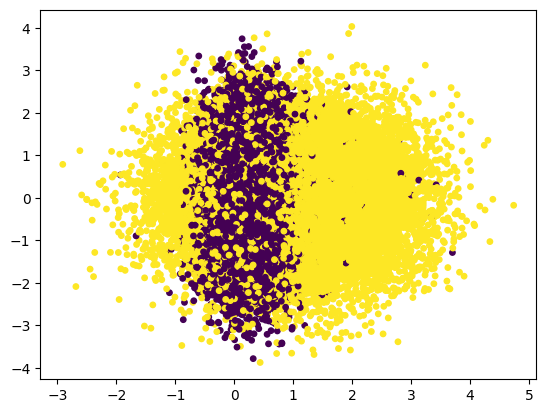

In [8]:
import matplotlib.pyplot as plt
#y = y.reshape(-1, 1)

print(X.shape, y.shape)
plt.scatter(X[:,0], X[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [9]:
y = np.eye(n_classes)[y]

initializer = keras.initializers.GlorotNormal(seed=12227)
opt = keras.optimizers.SGD(learning_rate=0.01)

inputs = keras.layers.Input(shape=(X.shape[-1],))

#no exemplo reduziu-se a qtdade de camadas para uma ou duas e os neuronio foram para 1024
H = keras.layers.Dense(units=1024, activation='relu', kernel_initializer=initializer)(inputs)
#H = keras.layers.Dense(units=16, activation='relu', kernel_initializer=initializer)(H)
#H = keras.layers.Dense(units=32, activation='relu', kernel_initializer=initializer)(H)
#H = keras.layers.Dense(units=64, activation='relu', kernel_initializer=initializer)(H)

outputs = keras.layers.Dense(units=n_classes, activation='sigmoid', kernel_initializer=initializer)(H)
model = keras.models.Model(inputs=inputs, outputs=outputs)

In [10]:
'''
#Opt1
scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)
model.compile(loss='categorical_crossentropy', optimizer=opt)
model.fit(X, y, epochs=50, callbacks=[scheduler])
y_pred = model.predict(X)
acc = accuracy_score(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))
print(acc)
'''

#Opt2
model.compile(loss='categorical_crossentropy', optimizer=opt)
T = 100
train_loss = []
val_loss = []
train_acc = []
val_acc = []
for t in range(T):
    #lr = 0.01 if t < 10 else (0.001 if t < 25 else 0.0001)
    lr = 0.01 if t < 400 else (0.001 if t < 600 else 0.0001) #- proposição para lr scheduler
    opt.learning_rate.assign(lr)  # Use the assign method for the learning rate
    #keras.backend.set_value(model.optimizer.learning_rate, lr)
    history = model.fit(X, y, validation_data=(X, y), epochs=t,initial_epoch=t - 1, batch_size=64, verbose=1)
    #callbacks=[early_stopping, reduce_lr]
    #model.fit(X, y, epochs=t, initial_epoch=t - 1, validation_data=(X,y),verbose=1,)
    train_loss.append(history.history['loss'][0])
    val_loss.append(history.history['val_loss'][0])
    train_acc.append(history.history.get('accuracy', [0])[0]*100)
    val_acc.append(history.history.get('val_accuracy', [0])[0]*100)

y_pred = model.predict(X)
acc = accuracy_score(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))
print('accuracy {:.2f}%'.format(acc*100))

754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3962 - val_loss: 0.2657
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2618 - val_loss: 0.2399
Epoch 2/2
754/754 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2359 - val_loss: 0.2215
Epoch 3/3
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2186 - val_loss: 0.2070
Epoch 4/4
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2034 - val_loss: 0.1951
Epoch 5/5
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1904 - val_loss: 0.1855
Epoch 6/6
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1809 - val_loss: 0.1779
Epoch 7/7
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1752 - val_loss: 0.1718
Epoch 8/8
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1712 - val_loss: 0.1668
Epoch 9/9
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1642 - val_loss: 0.1627
Epoch 10/10
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1612 - val_loss: 0.1593
Epoch 11/11
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1553 - val_loss: 0.1

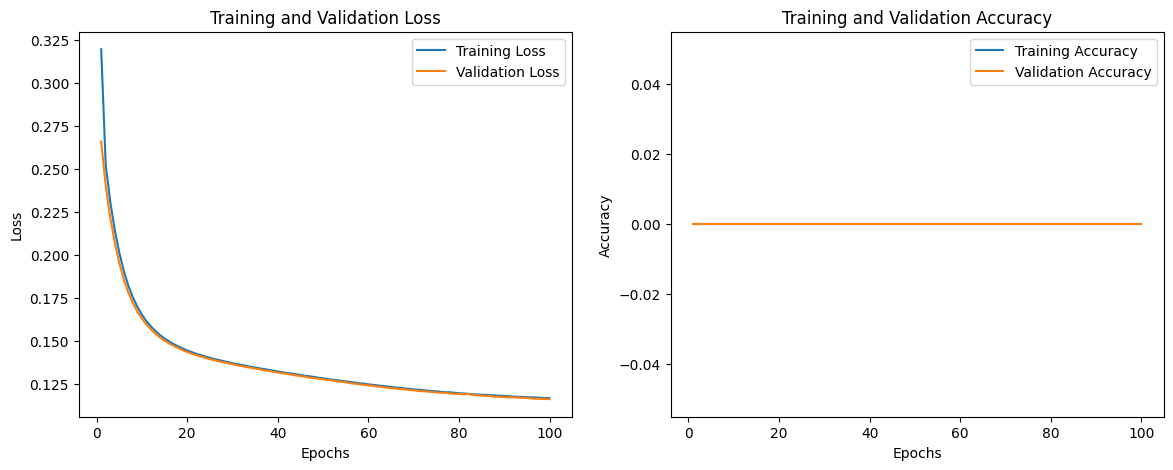

1507/1507 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step
Final accuracy on training data: 95.51440243877148


In [11]:
# Plotting the training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, T + 1), train_loss, label='Training Loss')
plt.plot(range(1, T + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, T + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, T + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

y_pred = model.predict(X)
acc = accuracy_score(np.argmax(y, axis=1), np.argmax(y_pred, axis=1))
print(f'Final accuracy on training data: {acc*100}')